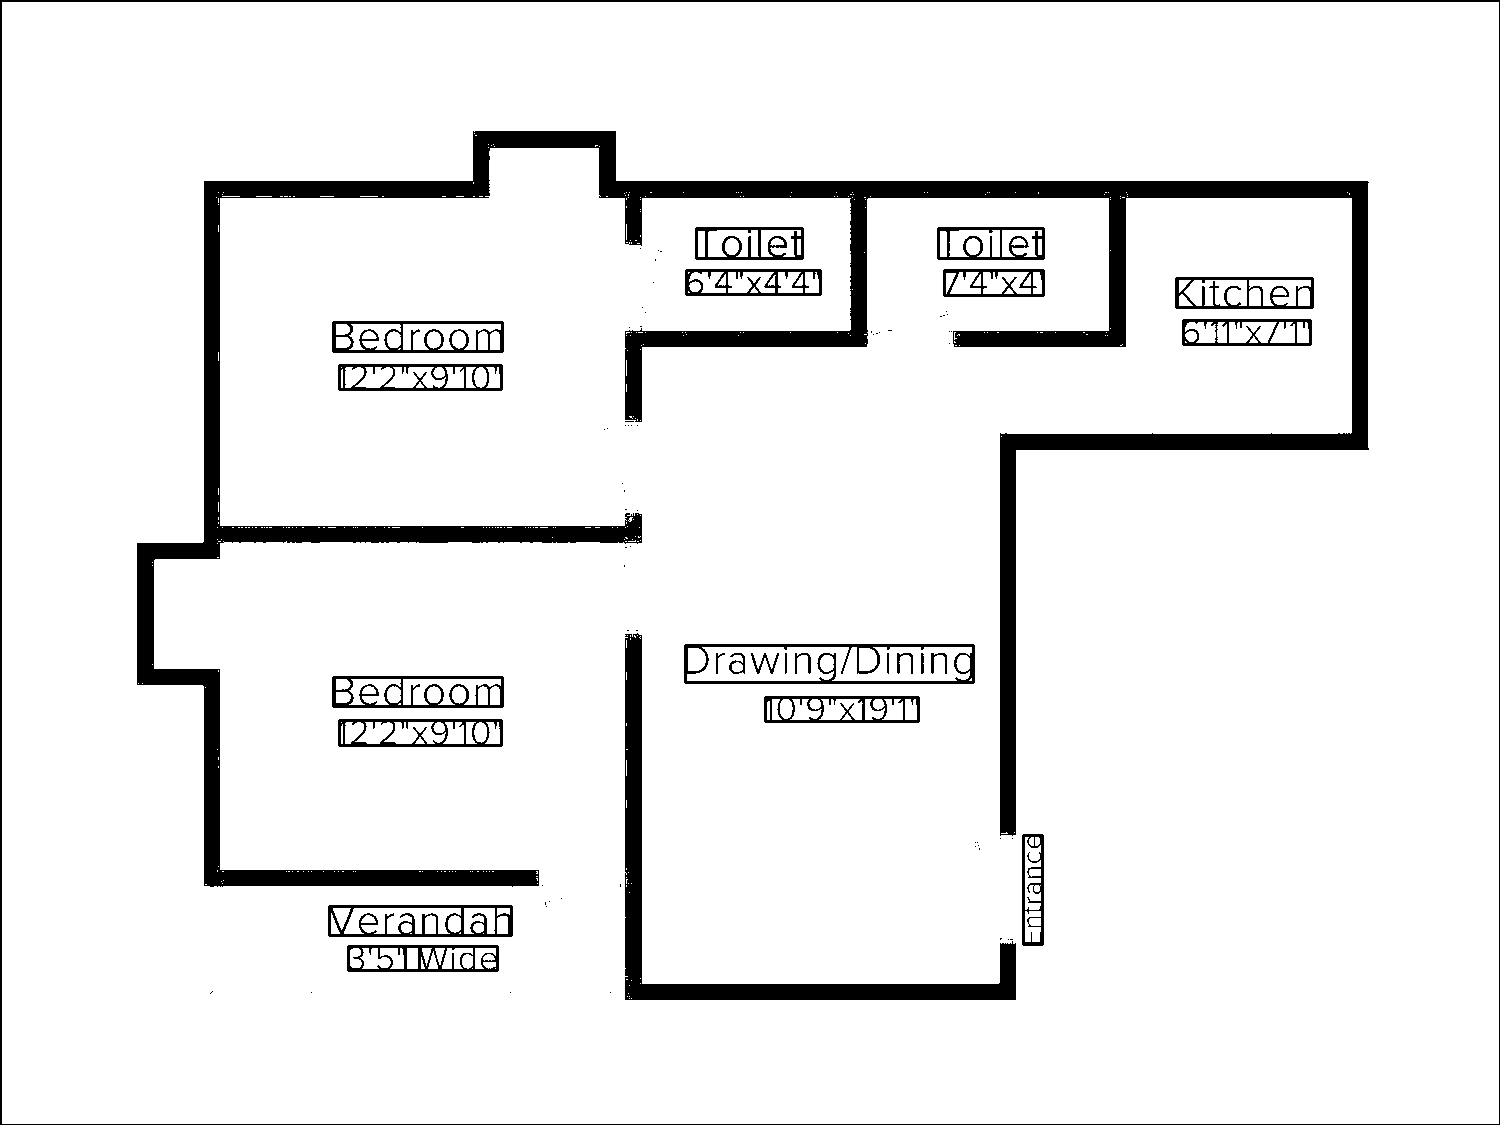

Toilet
Toilet
Kitchen
Bedroom
Drawing/Dining
Bedroom
Verandah
Entrance


In [60]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
import numpy as np
from pytesseract import Output
# 0034158_0000000.jpeg
# 0014482_0000000.jpg
im = Image.open('0034158_0000000.jpeg')

# preprocessing
im = im.point(lambda x: 0 if x < 90 else 255)   # threshold (binarize)
im = np.asarray(im)

x = im[:, :, 0] | im[:, :, 1] | im[:, :, 2]
im = Image.fromarray(x)


# display(im)

data = pytesseract.image_to_data(im, config='--psm 12', output_type=Output.DICT) 

n_boxes = len(data['level'])

im = np.asarray(im)

texts = []

for i in range(n_boxes):
    (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
    cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # print(data['conf'][i], data['text'][i])
    texts.append(data['text'][i])

display(Image.fromarray(im))


for t in texts:
    if not t.replace('/', '').isalpha() or len(t) < 3 or t.lower() in ['wide', 'room', 'area']:
        continue
    print(t)



In [2]:
!which tesseract

/usr/bin/tesseract


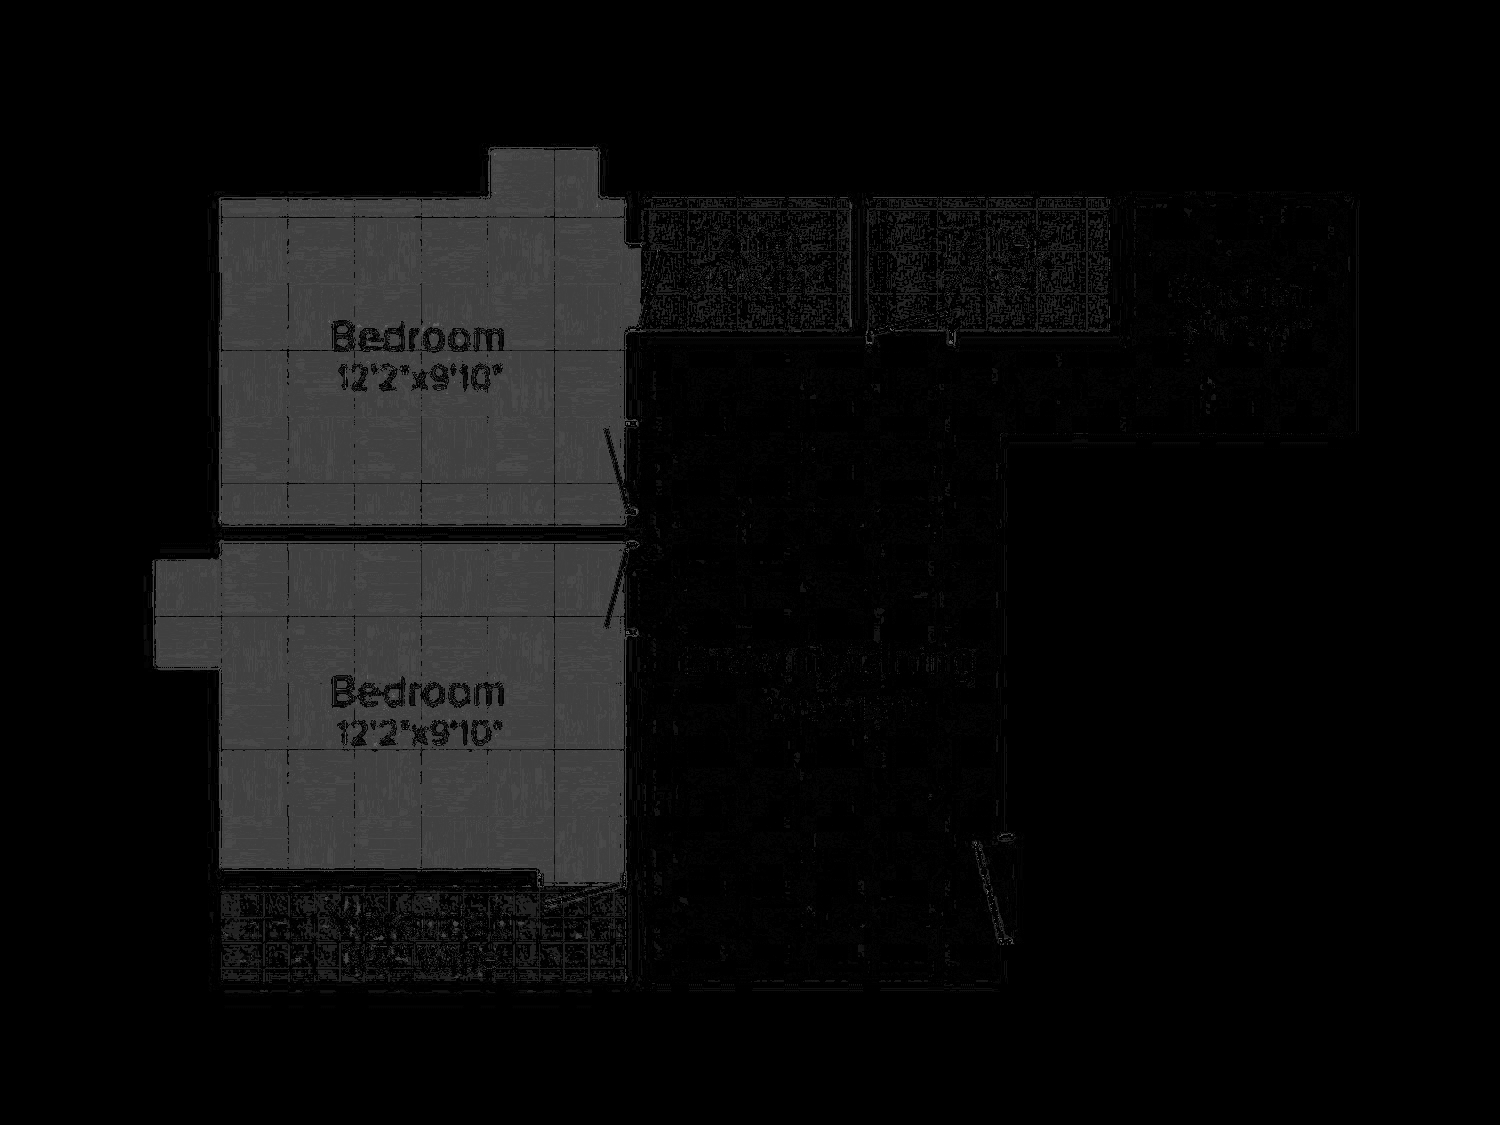

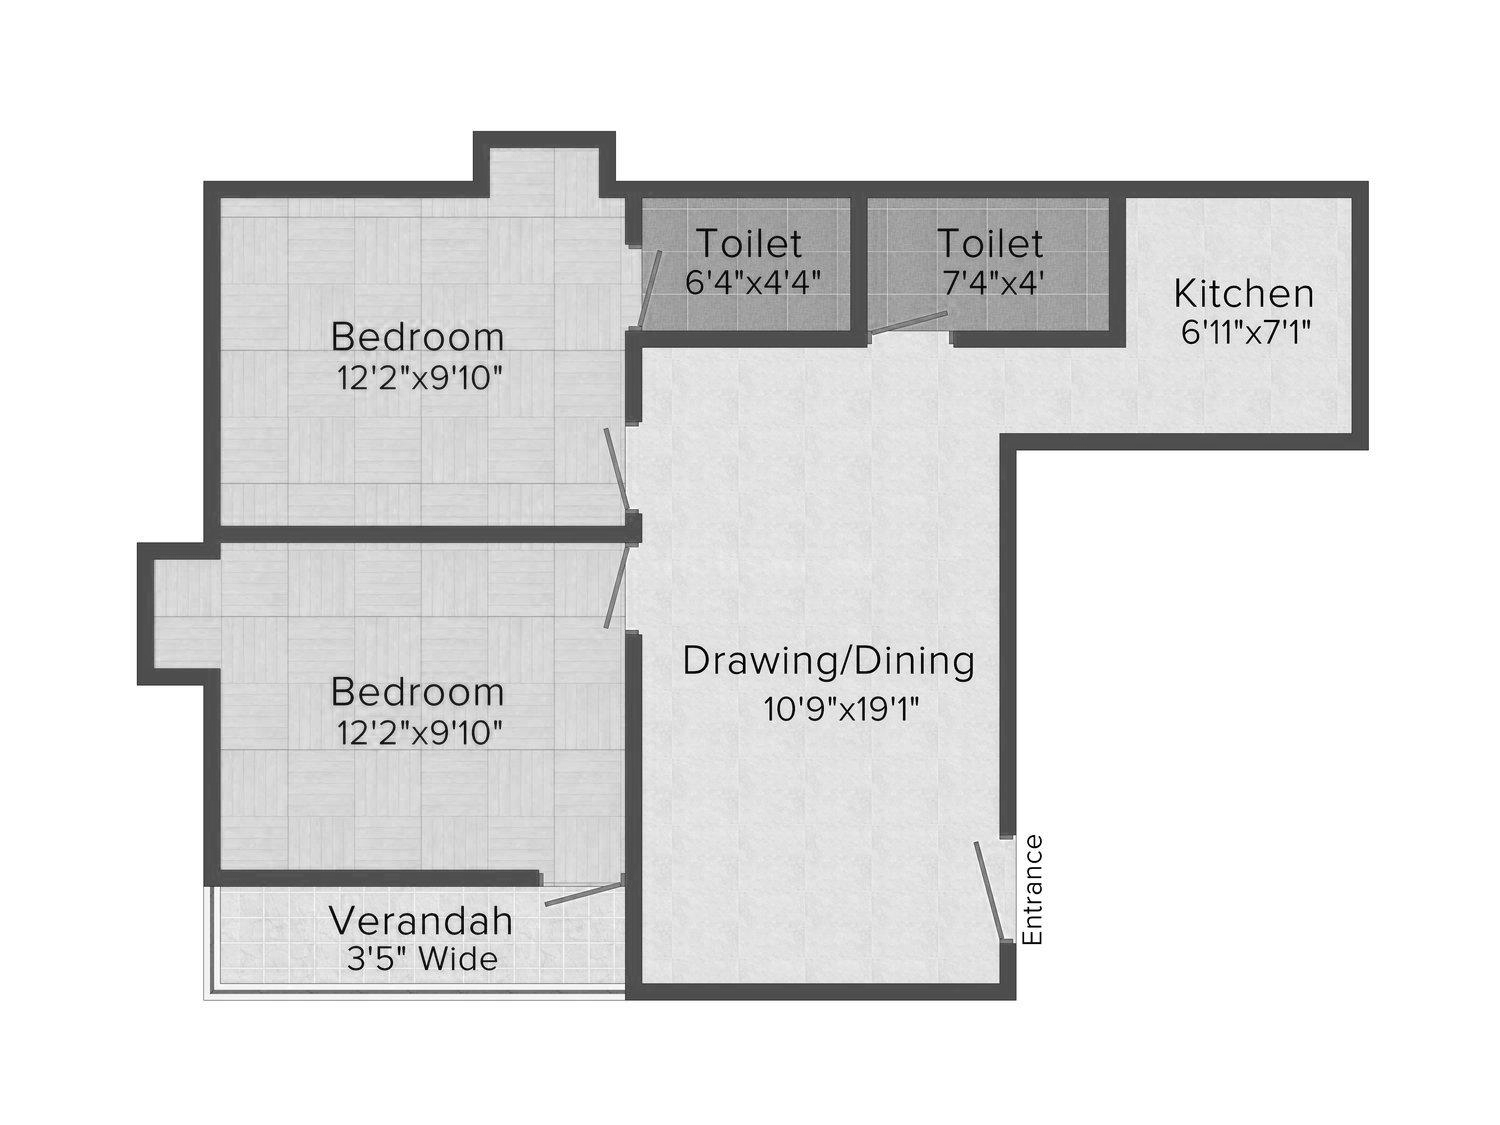

In [54]:
import cv2 

img = cv2.imread('0034158_0000000.jpeg')
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)

th, threshed = cv2.threshold(v, 0, 400, cv2.THRESH_BINARY_INV)
dst1 = cv2.bitwise_and(img, img, mask=threshed)


display(Image.fromarray(h&v&s))
display(Image.fromarray(v))


In [80]:
import cv2 
import numpy as np

img = cv2.imread('0034158_0000000.jpeg')
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)

th, threshed = cv2.threshold(v, 0, 400, cv2.THRESH_BINARY_INV)
dst1 = cv2.bitwise_and(img, img, mask=threshed)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
morph = cv2.morphologyEx(v, cv2.MORPH_CLOSE, kernel)

# display(Image.fromarray(v < 100))
labels_small = []
areas_small = [] 
nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(v, connectivity=8)
for l in range(1,nlabel):
    if stats[l,cv2.CC_STAT_AREA]<=20:
        labels_small.append(l)
        areas_small.append(stats[l,cv2.CC_STAT_AREA])

mask = np.ones_like(labels, dtype=np.uint8)

for l in labels_small:
    mask[labels == l] = 0
display(Image.fromarray(mask))


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'connectedComponentsWithStats'
> Overload resolution failed:
>  - image data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'image'


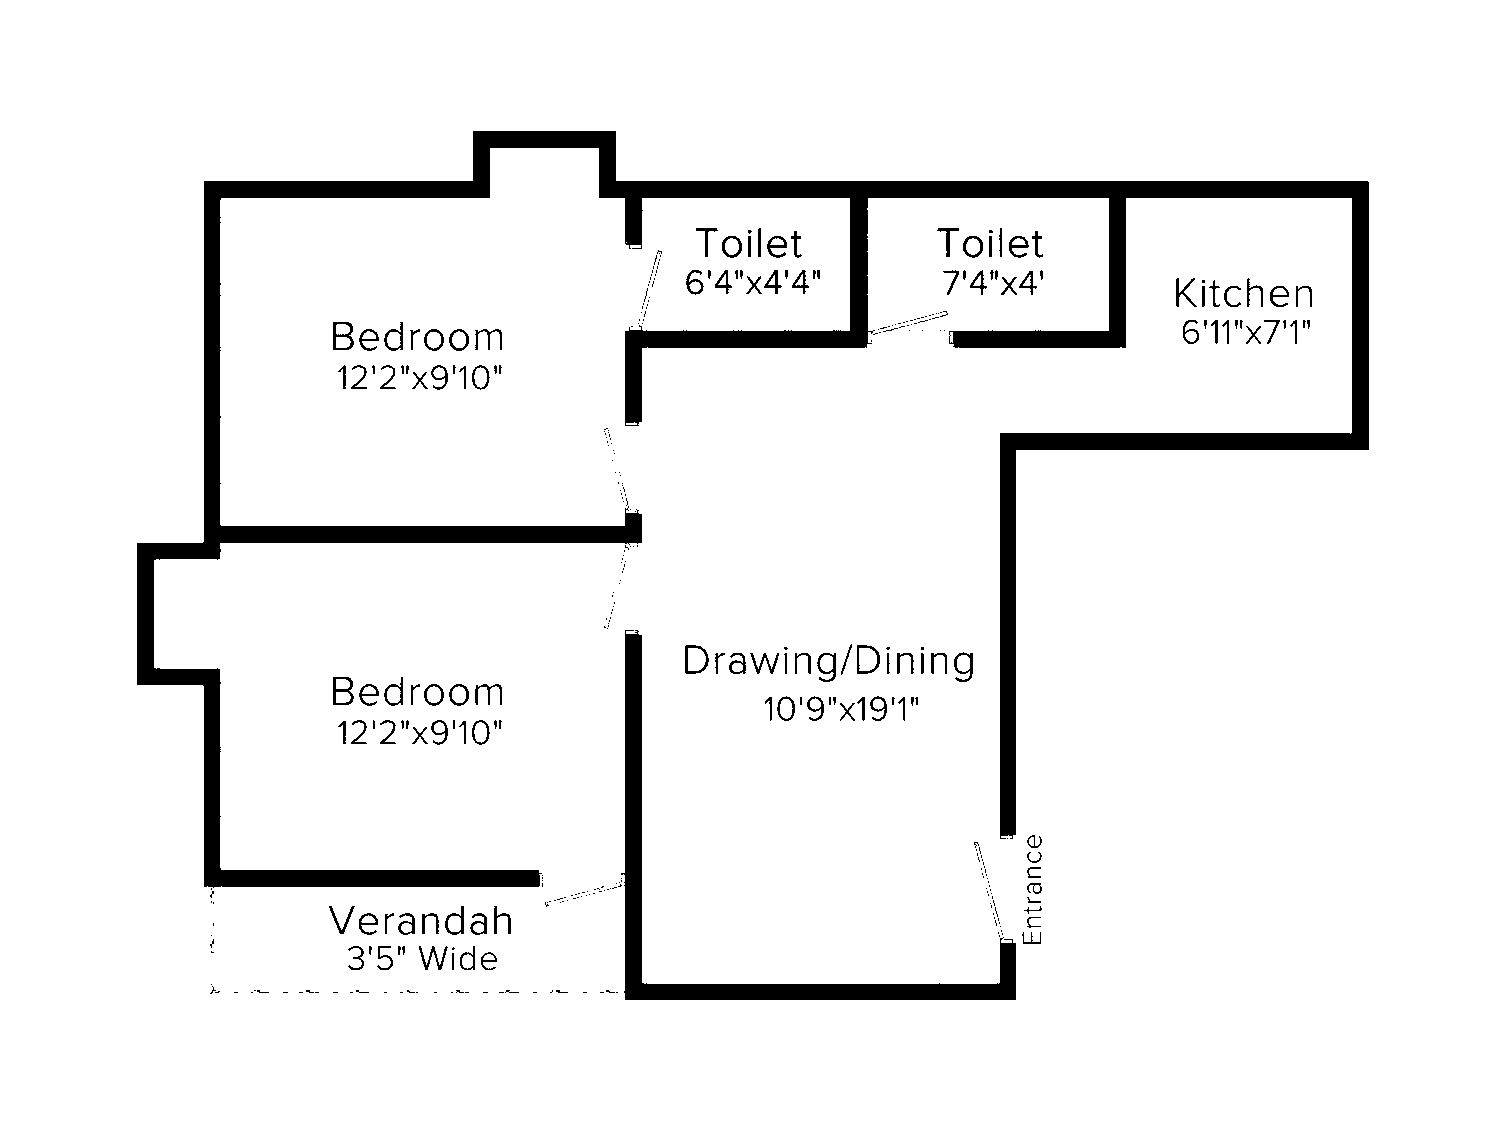

In [97]:

display(Image.fromarray(v>110))

